<a href="https://colab.research.google.com/github/codemayank17/NumDetectServer/blob/master/keras_CNNmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing**

In [0]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# **Data loading and processing**

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [0]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

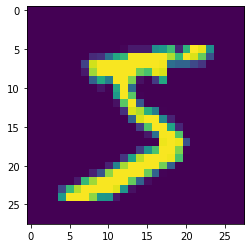

In [0]:
plt.imshow(x_train[0])

In [0]:
y_train[0]

5

In [0]:
#We will use OneHotEncoding on the target and then use a softmax layer to 
#check the probability of every label predicted by the NN.

ohe = OneHotEncoder()
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_train = ohe.fit_transform(y_train).toarray()
y_test = ohe.fit_transform(y_test).toarray()

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
print(y_test[200])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [0]:
x_train.min(), x_train.max()

(0, 255)

In [0]:
#We will normalize the values in the train and test set by dividing with 
#max value from input set

x_train, x_test = x_train/255, x_test/255

print(x_train.min(), x_train.max())

0.0 1.0


In [0]:
#Since we have to provide the information about the color channel used to 
#the NN, we need to reshape the data

x_train, x_test = x_train.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28, 1)

# **Creating the CNN model using Keras**

![alt text](https://miro.medium.com/max/1400/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)

In [0]:
model = Sequential()

#Layer 1
model.add(Conv2D(32, (5,5), strides=(1,1), padding='valid', input_shape=(28,28,1), activation='relu'))
#shape --> (24,24,32)
model.add(MaxPooling2D(pool_size=(2,2)))
#shape --> (12,12,32)

#Layer 2
model.add(Conv2D(64, (5,5), strides=(1,1), padding='valid', activation='relu'))
#shape --> (8,8,64)
model.add(MaxPooling2D(pool_size=(2,2)))
#shape --> (4,4,64)

#Flatten layer
model.add(Flatten())
#shape --> (1, 4*4*64) --> (1,1024)

#Fully connected layer 1
model.add(Dense(64, activation='relu'))

#Adding dropout to prevent overfitting
model.add(Dropout(0.2))

#Output layer
model.add(Dense(10, activation='softmax'))


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                65600     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# **Training the model**

In [0]:
model.fit(x_train, y_train, batch_size=100, epochs=10, shuffle=True)

Epoch 1/10
600/600 [==============================] - 53s 88ms/step - loss: 0.2335 - accuracy: 0.9297
Epoch 2/10
600/600 [==============================] - 53s 89ms/step - loss: 0.0681 - accuracy: 0.9790
Epoch 3/10
600/600 [==============================] - 53s 88ms/step - loss: 0.0477 - accuracy: 0.9855
Epoch 4/10
600/600 [==============================] - 53s 88ms/step - loss: 0.0369 - accuracy: 0.9889
Epoch 5/10
600/600 [==============================] - 53s 88ms/step - loss: 0.0296 - accuracy: 0.9910
Epoch 6/10
600/600 [==============================] - 53s 88ms/step - loss: 0.0254 - accuracy: 0.9919
Epoch 7/10
600/600 [==============================] - 53s 88ms/step - loss: 0.0209 - accuracy: 0.9933
Epoch 8/10
600/600 [==============================] - 53s 88ms/step - loss: 0.0194 - accuracy: 0.9938
Epoch 9/10
600/600 [==============================] - 52s 87ms/step - loss: 0.0157 - accuracy: 0.9949
Epoch 10/10
600/600 [==============================] - 52s 87ms/step - loss: 0.014

# **Evaluating the model on test set**

In [0]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0278 - accuracy: 0.9917


[0.02784087508916855, 0.9916999936103821]

# **Making predictions with the trained model**

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Predicted: 3


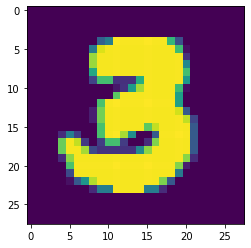

In [0]:
#Lets use our trained NN to make predictions on a random value from test set

print('Predicted: ' + str(model.predict_classes(x_test)[200]))
plt.imshow(x_test[200].reshape(28,28))

# **Saving the trained model**

In [0]:
model.save('/trained_model.h5')